# K-Means Clustering

Developing your own classes for a set of unlabeled data points.  We define K centroids and keep moving them until we get our classes; a data point is in a discovered class if it's closed to its centroid.

In [13]:
import numpy
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics
import ipywidgets as widgets

## Loading the Data

In [4]:
# No classes in this data; each column is an attribute
data = numpy.loadtxt("data_clustering.txt", delimiter=",")

## Visualizing the Input Data

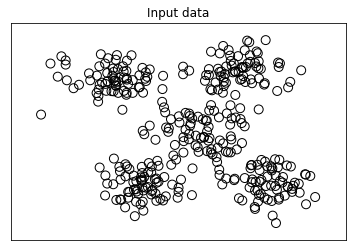

In [5]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

pyplot.figure()
pyplot.scatter(data[:, 0], data[:, 1], marker="o", facecolors="none", edgecolors="black", s=80)
pyplot.title("Input data")
pyplot.xlim(x_min, x_max)
pyplot.ylim(y_min, y_max)
pyplot.xticks(())
pyplot.yticks(())
pyplot.show()

## Training the Model

In [20]:
def classify(n_clusters=5):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_jobs=-1, n_init=20)
    kmeans.fit(data)
    
    step_size = 0.01
    x_vals, y_vals = numpy.meshgrid(
        numpy.arange(x_min, x_max, step_size),
        numpy.arange(y_min, y_max, step_size)
    )
    
    output = kmeans.predict(numpy.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    
    pyplot.figure()
    pyplot.clf()
    
    # The different regions
    pyplot.imshow(
        output,
        interpolation='nearest',
        extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
        cmap=pyplot.cm.Paired,
        aspect='auto',
        origin='lower'
    )

    # The data points
    pyplot.scatter(data[:, 0], data[:, 1], marker='o', facecolors='none', edgecolors='black', s=40)
    
    centers = kmeans.cluster_centers_
    pyplot.scatter(centers[:, 0], centers[:, 1], marker="o", s=210, linewidths=4, color='black', zorder=12, facecolors='black')

    pyplot.title("Clusters")
    pyplot.xlim(x_min, x_max)
    pyplot.ylim(y_min, y_max)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.show()
    
widgets.interactive(
    classify,
    n_clusters=widgets.IntSlider(min=2, max=10, value=5, description="# Clusters", continuous_update=False)
)

interactive(children=(IntSlider(value=5, continuous_update=False, description='# Clusters', max=10, min=2), Ou…